## Exercise 8.4 - Dyna-Q+ with Action Exploration Bonus

The exploration bonus described above actually changes the estimated values of states and
actions. Is this necessary? Suppose the bonus $\kappa \sqrt{\tau}$ was used not in
updates, but solely in action selection. That is, suppose the action selected was always
that for which $Q(S_t,a) + \kappa \sqrt{\tau(S_t,a)}$ was maximal. Carry out a gridworld
experiment that tests and illustrates the strengths and weaknesses of this alternate
approach.

In [1]:
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

from maze_c import maze_c
from dyna_c import dyna_q, dyna_q_plus

### Reproduction of Figure 8.5

In [2]:
env = maze_c()
env.seed(12345)
q0, policy0, history0 = dyna_q(env, n=50, num_episodes=400, alpha=0.5, gamma=0.95)

env = maze_c()
env.seed(12345)
q1, policy1, history1 = dyna_q_plus(env, n=50, num_episodes=400, alpha=0.5, gamma=0.95,
                                    kappa=1e-3, action_only=False)

In [3]:
def plot_learning(histories, labels):
    with matplotlib.rc_context({'figure.figsize': [10, 10]}):
        plt.plot([0, 1])
        plt.figure()
        plt.title(f"Cumulative Reward")
        plt.xlabel("Timesteps")
        plt.ylabel("Cumulative Reward")
    
        plt.xlim([0, 6_000])
        plt.ylim([0, 400])
        
        for history, label in zip(histories, labels):
            plt.plot(np.cumsum(history), label=label)
    
        plt.legend()
        plt.show()

def plot_results(env, q, policy, label):
    # Render example episode
    done, state = False, env.reset()
    env.render()
    while not done:
        action = np.random.choice(env.action_space, p=policy[state[0]][state[1]])
        state, reward, done, info = env.step(action)
        env.render()
    plt.title(f"Example Episode ({label})")

    #env = env.unwrapped
    fig = plt.figure()
    ax = fig.gca()
    ax.set_title(f"Value Function and Policy ({label})")
    ax.set_xticks([])
    ax.set_yticks([])

    # Plot value function
    q = np.copy(q)
    unvisited = np.where(q == 0)
    q[unvisited] = -np.inf
    v = np.max(q, axis=2).reshape(env.observation_space)
    ax.imshow(v, origin='lower')

    # Plot actions of the policy
    arrows = np.empty([env.observation_space[0],env.observation_space[1],2])
    a_stars = np.argmax(policy0, axis=2)
    for x, a in enumerate(a_stars):
        for y,b in enumerate(a):
            if v[x][y] > -np.inf:
                arrows[x][y] = env.base_actions[b]
            else:
                arrows[x][y] = (0,0)
    arrows = arrows.reshape([*env.observation_space, 2])
    yr = []
    for c in range(env.observation_space[0]):
        for i in range(env.observation_space[1]):
            yr = np.append(yr,c)
    xr_unit = np.arange(env.observation_space[1])
    xr = []
    for i in range(env.observation_space[0]):
        xr = np.append(xr,xr_unit)
    arrow_U = arrows[:, :, 1].flatten()
    arrow_V = arrows[:, :, 0].flatten()
    ax.quiver(xr, yr, arrow_U, arrow_V, pivot='mid', scale=20)

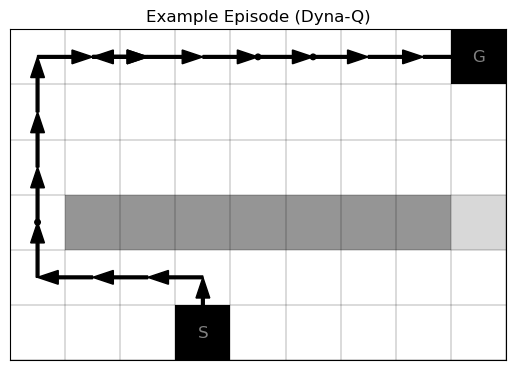

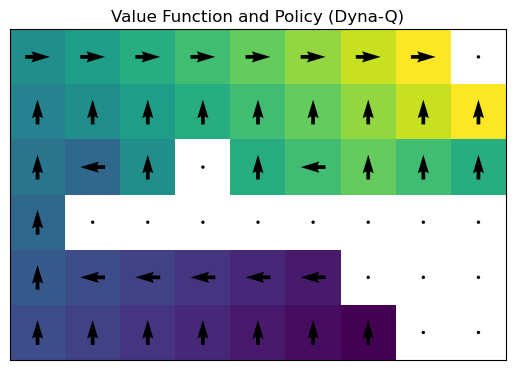

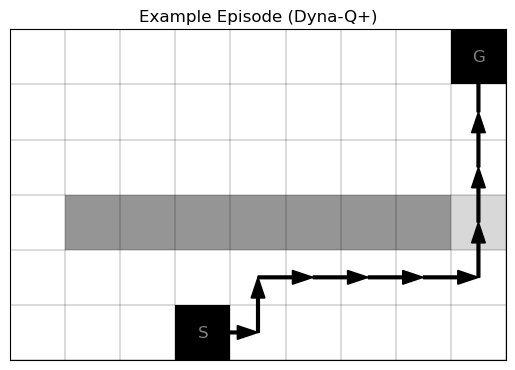

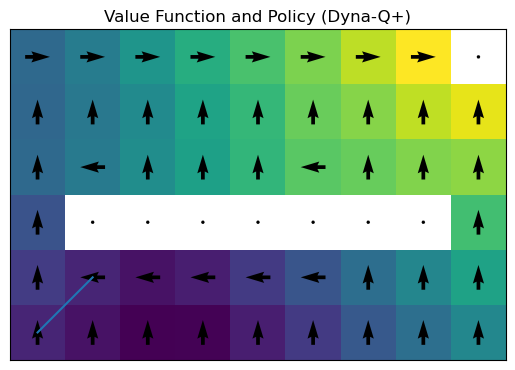

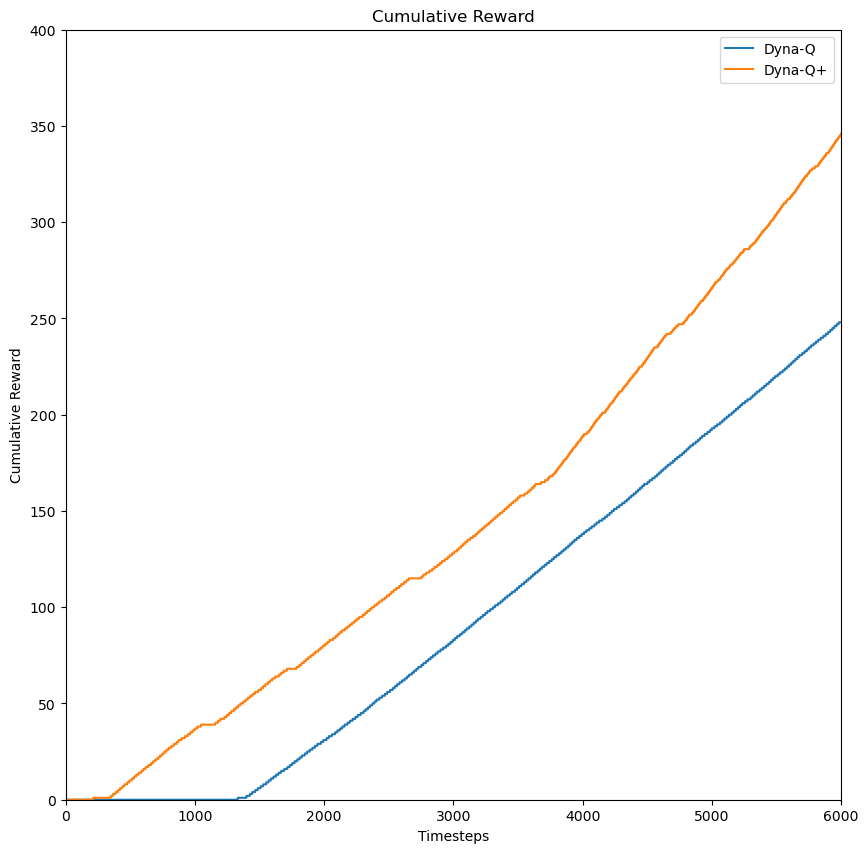

In [4]:
plot_results(env, q0, policy0, "Dyna-Q")
plot_results(env, q1, policy1, "Dyna-Q+")

plot_learning([history0, history1], ["Dyna-Q", "Dyna-Q+"])

### Benchmark of Dyna-Q+ with Action Only Exploration Bonus

Using exploration bonus for actions only resulted in faster learning in the initial phase before
the shortcut was opened. Howerver the exploration bonus wasn't stable enough to discover and
exploit the shortcut. The bonus affects only a single action selection and isn't able to
systematically map out areas unvisited for a long time.
 
Dyna-Q+ directly increases action values of unvisited areas it's able to create a map of the
long since visited territory and plan periodic repeated visits to these states.

In [5]:
env = maze_c()
env.seed(12345)
q2, policy2, history2 = dyna_q_plus(env, n=50, num_episodes=400, alpha=0.5, gamma=0.95,
                                    kappa=1e-3, action_only=True)

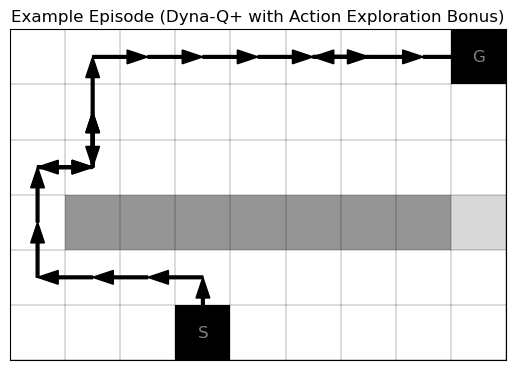

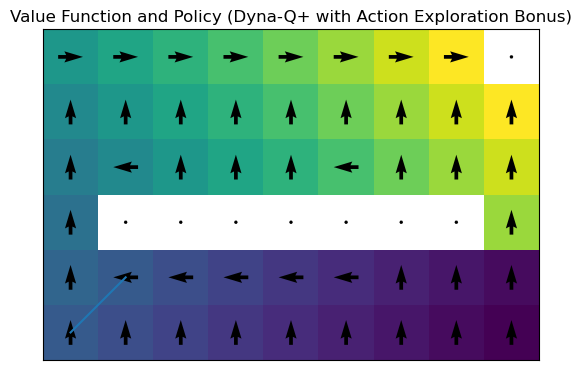

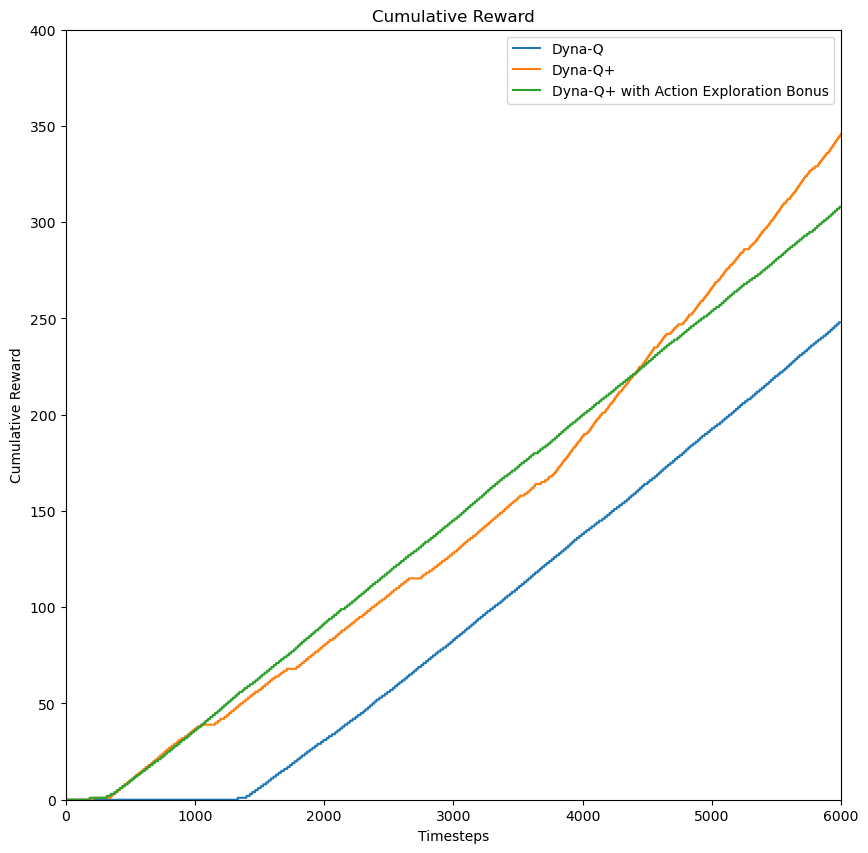

In [6]:
plot_results(env, q2, policy2, "Dyna-Q+ with Action Exploration Bonus")

plot_learning([history0, history1, history2],
              ["Dyna-Q", "Dyna-Q+", "Dyna-Q+ with Action Exploration Bonus"])